In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Code to display graphs in the notebook
%matplotlib inline

In [3]:
#Create a file path
path= r'C:\Users\Zinnia\Documents\Career Foundry Data Analytics Course\Achievement 6\Data\Edited'

In [4]:
#Import Data
df=pd.read_csv(os.path.join(path, 'County_Data_with_Coordinates.csv'), index_col=False)

#Data checks and cleaning

In [5]:
df.columns

Index(['County', 'Latitude', 'Longitude', 'Total_Acres_Open_Space',
       'Total_Num_Lots', 'Acres_In_County', 'Percent_Open_Space',
       'Population_in_2020', 'Percent_Open_Space_Per_Person'],
      dtype='object')

In [6]:
df.head()

,County,Latitude,Longitude,Total_Acres_Open_Space,Total_Num_Lots,Acres_In_County,Percent_Open_Space,Population_in_2020,Percent_Open_Space_Per_Person
0,Atlantic,39.507885,-75.170510,390.772836,6701,430000,0.09%,264650,0.00
1,Bergen,40.947714,-74.364116,22144.340800,2316,157900,14.02%,931275,0.02
2,Burlington,39.861181,-75.286718,185462.562900,9457,525000,35.33%,446301,0.42
3,Camden,39.801846,-75.218956,29503.784660,1882,145500,20.28%,506721,0.06
4,Cape May,39.055172,-75.378565,67831.195620,8992,397000,17.09%,92701,0.73


In [7]:
df.shape

(21, 9)

In [8]:
# Check for missing values

df.isnull().sum()

County                           0
Latitude                         0
Longitude                        0
Total_Acres_Open_Space           0
Total_Num_Lots                   0
Acres_In_County                  0
Percent_Open_Space               0
Population_in_2020               0
Percent_Open_Space_Per_Person    0
dtype: int64

#No missing values found

In [9]:
#Check for duplicates
dups = df.duplicated()

In [10]:
dups.shape

(21,)

#No duplicates found

<AxesSubplot:xlabel='Total_Acres_Open_Space', ylabel='Count'>

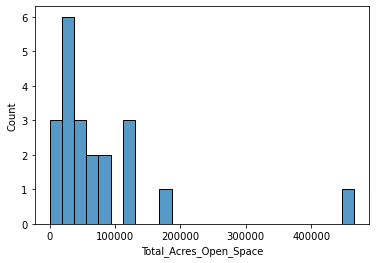

In [11]:
#Check for extreme values
sns.histplot(df['Total_Acres_Open_Space'], bins=25)

#I already looked into the outlier value in the last lesson for Ocean County. It is not an error and will be kept in the dataset.

In [12]:
#More data checks
df['Total_Acres_Open_Space'].mean()

79146.72052709523

In [13]:
df['Total_Acres_Open_Space'].median()

53156.53132

In [14]:
df['Total_Acres_Open_Space'].max()

465602.5692

In [15]:
df['Total_Acres_Open_Space'].min()

390.772836

#My hypothesis is that there is a positive correlation between the total acres in the county/municipality and the amount of preserved open space in the county/municipality

## Regression Analysis

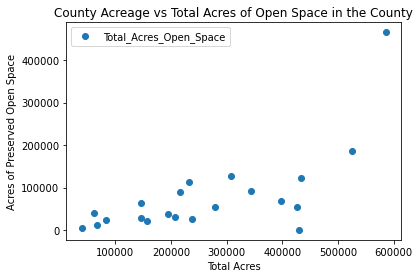

In [16]:
#Create a satterplot

df.plot(x = 'Acres_In_County', y='Total_Acres_Open_Space',style='o')
plt.title('County Acreage vs Total Acres of Open Space in the County')  
plt.xlabel('Total Acres')  
plt.ylabel('Acres of Preserved Open Space')  
plt.show()

#This is already interesting! I can see a positive correlation between my variables at last!

In [17]:
#Put the variables into NumPy arrays as objects

X = df['Acres_In_County'].values.reshape(-1,1)
y = df['Total_Acres_Open_Space'].values.reshape(-1,1)

In [18]:
X

array([[430000],
       [157900],
       [525000],
       [145500],
       [397000],
       [434000],
       [ 82960],
       [215800],
       [ 39880],
       [280000],
       [146500],
       [206600],
       [426000],
       [308000],
       [586000],
       [ 62144],
       [238300],
       [195100],
       [343000],
       [ 67460],
       [232200]], dtype=int64)

In [19]:
y

array([[3.90772836e+02],
       [2.21443408e+04],
       [1.85462563e+05],
       [2.95037847e+04],
       [6.78311956e+04],
       [1.23480539e+05],
       [2.35073222e+04],
       [9.02694156e+04],
       [4.20700670e+03],
       [5.31565313e+04],
       [6.27255131e+04],
       [3.12383118e+04],
       [5.37843531e+04],
       [1.28067272e+05],
       [4.65602569e+05],
       [3.94739762e+04],
       [2.57376486e+04],
       [3.67112723e+04],
       [9.17791582e+04],
       [1.27217192e+04],
       [1.14285866e+05]])

In [20]:
# Split data into a training set and a test set using the train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#I had to condense my data down to the county level for the last geographic analysis and to the municipal level from the original all open space level. Now its so small that I don't think it will yield very accurate results but onward..

In [21]:
# Create a regression object for the training set

regression = LinearRegression()

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

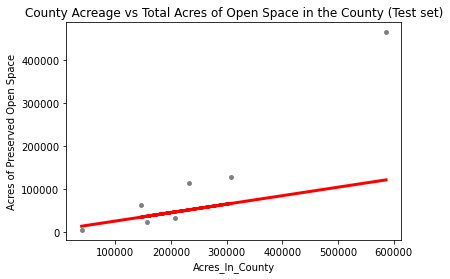

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('County Acreage vs Total Acres of Open Space in the County (Test set)')
plot_test.xlabel('Acres_In_County')
plot_test.ylabel('Acres of Preserved Open Space')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics and evaluate the model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.19786698]]
Mean squared error:  18248219663.48023
R2 score:  0.16871077013026503


In [27]:
y_predicted

array([[ 13144.72603273],
       [ 66196.82115029],
       [ 51198.50394191],
       [ 36496.98720599],
       [ 46133.1092119 ],
       [ 34241.30361529],
       [121203.84204646]])

In [28]:
# Create a dataframe comparing the actual & predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4207.006703,13144.726033
1,128067.271700,66196.821150
2,114285.866100,51198.503942
3,22144.340800,36496.987206
4,31238.311850,46133.109212
5,62725.513100,34241.303615
6,465602.569200,121203.842046


In [29]:
# Predict y

y_predicted_train = regression.predict(X_train)

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
#Check the model statistics for MSE and R2

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.19786698]]
Mean squared error:  1428106304.4811788
R2 score:  0.3757626902224904


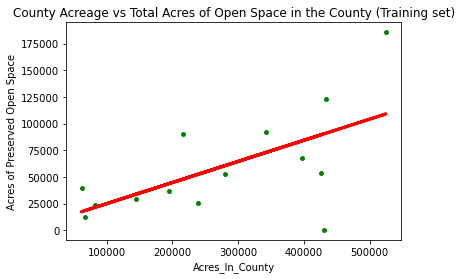

In [32]:
# Visualizing the test set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('County Acreage vs Total Acres of Open Space in the County (Training set)')
plot_test.xlabel('Acres_In_County')
plot_test.ylabel('Acres of Preserved Open Space')
plot_test.show()

#This algorithim turned out results that are much lower than that of the municipal data! I'm glad I did both to compare them. This one also shows a regression line with a positive correlation in the middle of the data but the scale is much different and the accuracy would likely be quite off if this model was applied to the municipal dataset. 